In [2]:
############ POLYNOMIALS ##################

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

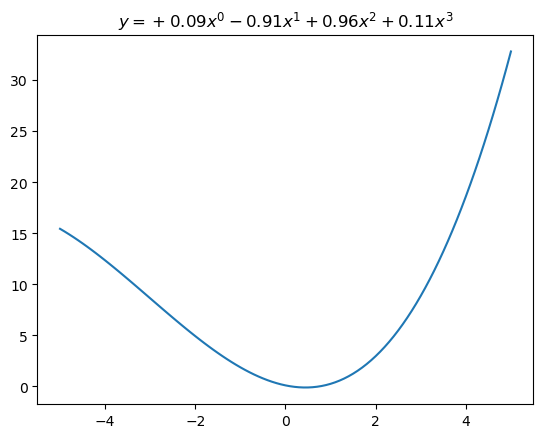

In [8]:
# create random (stochastic!) coefficients
coefs = np.random.randn(4) # create 4 random coefficients (from a gaussian distribution)

xx = np.linspace(-5,5,101) # range of -5 to 5 in 101 steps
y = np.zeros(len(x)) # initialize outputs to zeros, same number as x values

# function name for building the plot title
fname = '$y = '

for i,c in enumerate(coefs):
    # output y is itself plus the current coefficient multiplied by the dependent var x to the i-th power(starts at 0 and increases)
    y = y + c*xx**i
    # just adding to the title for display, uses formatting to remove + if coeff is negative
    fname += '+ '[int(c<0)] + f'{c:.2f}x^{i}' # format coeff c to two decimals with :.2f

# plot the function
  # note if you run this several times the different shapes that allow you to infer the order and whether the coefficient is positive/negative
  # in some cases you'll see it look like a even/2nd order polynomial (i.e. a U shape instead of a odd function S shape) - if you zoom out on the domain, you'll see the S shape though
plt.plot(xx,y)
plt.title(fname + '$')
plt.show()




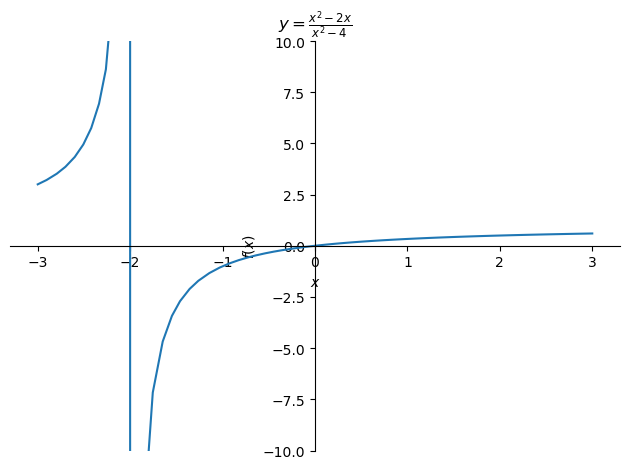

In [12]:
###### Creating a Rational Polynomial with Sympy #############

# just another way to create a symbolic variable - could also do `x = sym.symboles('x')`
from sympy.abc import x

# define function in two parts (the numerator and denominator for the rational polynomial we want to create)
top = x**2 - 2*x
bot = x**2 - 4
# rational function
sy = top / bot # separating these into top and bottom vars eliminates potential precedence rules that could mess up the calculation if inlined

#again, note that you need to specify the range and domain if you don't want sympy to pick them for you
  # this would be a tuple of: (variable, lower bound, upper bound) and ylim argument for the y axis limitation
sym.plot(
    sy, 
    (x,-3,3),
    ylim=[-10,10],
    title=f'$y = {sym.latex(sy)}$'
)

# Note again, the limitations of the plotting engine in sympy -overlapping titles and lables that don't display nicely - and hard to modify
# in practice, it's better to use sym.lambdify to convert the expression into a function and use matplotlib to customize the plots



C:\Users\New AMD 5600G Build\AppData\Local\Temp\ipykernel_15132\636882303.py:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  den = np.math.factorial(2*n-1)


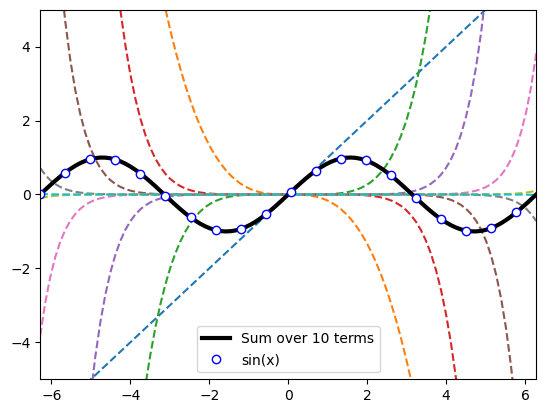

In [30]:
############ Mclaurin Series Sin Wave ####################


order = 10

x = np.linspace(-2*np.pi,2*np.pi,100) # input is starting at -2 * pi up to 2 * pi
y = np.zeros(len(x))

# loop over the polynomial orders
# note that since python starts at 0, we need to start at 1 and go to 10 (the end is exclusive and zero based, so we add 1 to get 11 (excl) so we get to 10)
for n in range(1,order+1):
    # The maclaurin series sin wave function
    sign = (-1)**(n+1)
    num = x**(2*n-1) # polynomial
    den = np.math.factorial(2*n-1)
    thisterm = sign * num/den

    # plot just the term
    plt.plot(x,thisterm,'--')

    # sum it onto y the output, the output equals itself plus this term
    y += thisterm

# plot the sum (black line)
plt.plot(x,y,'k',linewidth=3, label=f'Sum over {order} terms') # linwidth makes the line thicker
# draw up a plot to make sure the result matches a sine wave (use the built in numpy sin wave output to make sure it overlaps with the output of our function)
plt.plot(x[::5],np.sin(x[::5]), 'bo', markerfacecolor='w', linewidth=3, label='sin(x)') # the [::2] code means to skip the specified number of elements in the arr to show less points
plt.legend()
# we need to scale in to get the sin wave to show (zoomed out too far just looks like a flat line)
plt.ylim([-5,5]) # scale the y axis to -5 to +5
# when working with a numpy array, you can pass in a sub array to indicate which values to select. In this case the first (0) and the last (-1): arr[[firstSelection,secondSelection]]
plt.xlim(x[[0,-1]]) # can make the x domain equal to the domain set in x above (-2pi to +2pi), make it the first term in x and the last (-1) term in x
plt.show()